# Подчистка данных

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

# Набор данных CAR DATASET

In [111]:
df = pd.read_csv("Car Dataset 1945-2020.csv")
df

C:\Users\erik_\AppData\Local\Temp\ipykernel_2808\3377777559.py:1: DtypeWarning: Columns (9,11,12,13,14,15,16,17,19,20,24,27,29,33,43,44,47,49,51,69,75,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Car Dataset 1945-2020.csv")


,id_trim,Make,Modle,Generation,Year_from,Year_to,Series,Trim,Body_type,load_height_mm,...,front_suspension,steering_type,car_class,country_of_origin,number_of_doors,safety_assessment,rating_name,battery_capacity_KW_per_h,electric_range_km,charging_time_h
0,1,AC,ACE,1 generation,1993.0,2000.0,Cabriolet,3.5 MT,Cabriolet,NaN,...,Helical springs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,AC,ACE,1 generation,1993.0,2000.0,Cabriolet,4.6 MT,Cabriolet,NaN,...,Helical springs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,AC,ACE,1 generation,1993.0,2000.0,Cabriolet,4.9 AT,Cabriolet,NaN,...,Helical springs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,AC,ACE,1 generation,1993.0,2000.0,Roadster,2.9 AT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,AC,ACE,1 generation,1993.0,2000.0,Roadster,2.9 MT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70818,70983,ZX,Landmark,1 generation,2007.0,2009.0,SUV 5 doors,2.4 AT 4WD,NaN,NaN,...,NaN,NaN,J,China,5.0,NaN,NaN,NaN,NaN,NaN
70819,70984,ZX,Landmark,1 generation,2007.0,2009.0,SUV 5 doors,2.4 MT,NaN,NaN,...,NaN,NaN,J,China,5.0,NaN,NaN,NaN,NaN,NaN
70820,70985,ZX,Landmark,1 generation,2007.0,2009.0,SUV 5 doors,2.4 MT 4WD,NaN,NaN,...,NaN,NaN,J,China,5.0,NaN,NaN,NaN,NaN,NaN
70821,70986,ZX,Landmark,1 generation,2007.0,2009.0,SUV 5 doors,3.2 AT 4WD,NaN,NaN,...,NaN,NaN,J,China,5.0,NaN,NaN,NaN,NaN,NaN


In [112]:
translate = ['id', 'Производитель', 'Модель', 'Поколение', 'Год изготовления','Выпускался до','Серия','трим','Тип кузова','load_hieght_mm', 'Вместимость, чел.','Длинна авто в мм', 'Ширина авто, мм','высота авто, мм','Ширина колесной базы','front track', 'rear track', 'Вес авто','Радиус колес','Клиренс','trailer load  with brakes','Полезная нагрузка','back track width','front track width','Клиренс','Полный вес','front rear axle load','Вместимость багажника','Габариты грузового отсека длинна-ширина-высота','Объем грузового отсека','Минимальная пропускная способность','Максимальный крутящий момент','Тип впрыска','Распред вал','Тип цилиндров','Число цилиндров','Коэффициент сжатия','Тип двигателя','Клапанов на цилиндр','Тип буста','Диаметр цилиндров','Величина хода цилиндра','Расположение двигателя','Диаметр цилиндра и цикл хода','Число оборотов при макс крутящем моменте','Максимальная мощность двигателя','Наличие Интеркулера','Объем двигателя','Число л.c.','Число л.c. об/мин', 'Ведущие колеса','Передаточное число','Число передач','Поворотный круг','Тип трансмиссии','Расход топлива при смешенном режиме езды','Дальность хода','Норма выброса','Емкость топливного бака','Разгон до сотни','Максимальная скорость','Расход в городе','Выбросов на км','Тип топлива','Расход на трассе','Задняя подвеска','Задняя подвеска','Передние тормоза','Передняя подвеска','Тип рулевого упровления','Класс авто','Страна производитель','Кол-во дверей','Оценка безопасности','рейтинг','Расходи батареи на 100 км','Дальность хода на батареи','Время зарядки']
translate

['id',
 'Производитель',
 'Модель',
 'Поколение',
 'Год изготовления',
 'Выпускался до',
 'Серия',
 'трим',
 'Тип кузова',
 'load_hieght_mm',
 'Вместимость, чел.',
 'Длинна авто в мм',
 'Ширина авто, мм',
 'высота авто, мм',
 'Ширина колесной базы',
 'front track',
 'rear track',
 'Вес авто',
 'Радиус колес',
 'Клиренс',
 'trailer load  with brakes',
 'Полезная нагрузка',
 'back track width',
 'front track width',
 'Клиренс',
 'Полный вес',
 'front rear axle load',
 'Вместимость багажника',
 'Габариты грузового отсека длинна-ширина-высота',
 'Объем грузового отсека',
 'Минимальная пропускная способность',
 'Максимальный крутящий момент',
 'Тип впрыска',
 'Распред вал',
 'Тип цилиндров',
 'Число цилиндров',
 'Коэффициент сжатия',
 'Тип двигателя',
 'Клапанов на цилиндр',
 'Тип буста',
 'Диаметр цилиндров',
 'Величина хода цилиндра',
 'Расположение двигателя',
 'Диаметр цилиндра и цикл хода',
 'Число оборотов при макс крутящем моменте',
 'Максимальная мощность двигателя',
 'Наличие Интер

In [113]:
engl = [column for column in df]

In [114]:
for eng, ru in zip(engl, translate):
    print(eng+'        '+ ru)

id_trim        id
Make        Производитель
Modle        Модель
Generation        Поколение
Year_from        Год изготовления
Year_to        Выпускался до
Series        Серия
Trim        трим
Body_type        Тип кузова
load_height_mm        load_hieght_mm
number_of_seats        Вместимость, чел.
length_mm        Длинна авто в мм
width_mm        Ширина авто, мм
height_mm        высота авто, мм
wheelbase_mm        Ширина колесной базы
front_track_mm        front track
rear_track_mm        rear track
curb_weight_kg        Вес авто
wheel_size_r14        Радиус колес
ground_clearance_mm        Клиренс
trailer_load_with_brakes_kg        trailer load  with brakes
payload_kg        Полезная нагрузка
back_track_width_mm        back track width
front_track_width_mm        front track width
clearance_mm        Клиренс
full_weight_kg        Полный вес
front_rear_axle_load_kg        front rear axle load
max_trunk_capacity_l        Вместимость багажника
cargo_compartment_length_width_height_mm     

In [115]:
df.columns = translate

In [116]:
df

,id,Производитель,Модель,Поколение,Год изготовления,Выпускался до,Серия,трим,Тип кузова,load_hieght_mm,...,Передняя подвеска,Тип рулевого упровления,Класс авто,Страна производитель,Кол-во дверей,Оценка безопасности,рейтинг,Расходи батареи на 100 км,Дальность хода на батареи,Время зарядки
0,1,AC,ACE,1 generation,1993.0,2000.0,Cabriolet,3.5 MT,Cabriolet,NaN,...,Helical springs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,AC,ACE,1 generation,1993.0,2000.0,Cabriolet,4.6 MT,Cabriolet,NaN,...,Helical springs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,AC,ACE,1 generation,1993.0,2000.0,Cabriolet,4.9 AT,Cabriolet,NaN,...,Helical springs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,AC,ACE,1 generation,1993.0,2000.0,Roadster,2.9 AT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,AC,ACE,1 generation,1993.0,2000.0,Roadster,2.9 MT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70818,70983,ZX,Landmark,1 generation,2007.0,2009.0,SUV 5 doors,2.4 AT 4WD,NaN,NaN,...,NaN,NaN,J,China,5.0,NaN,NaN,NaN,NaN,NaN
70819,70984,ZX,Landmark,1 generation,2007.0,2009.0,SUV 5 doors,2.4 MT,NaN,NaN,...,NaN,NaN,J,China,5.0,NaN,NaN,NaN,NaN,NaN
70820,70985,ZX,Landmark,1 generation,2007.0,2009.0,SUV 5 doors,2.4 MT 4WD,NaN,NaN,...,NaN,NaN,J,China,5.0,NaN,NaN,NaN,NaN,NaN
70821,70986,ZX,Landmark,1 generation,2007.0,2009.0,SUV 5 doors,3.2 AT 4WD,NaN,NaN,...,NaN,NaN,J,China,5.0,NaN,NaN,NaN,NaN,NaN


In [117]:
df.corr() # Таблица корреляции данных

C:\Users\erik_\AppData\Local\Temp\ipykernel_2808\1988533294.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() # Таблица корреляции данных


,id,Год изготовления,Выпускался до,Полезная нагрузка,back track width,front track width,Полный вес,Минимальная пропускная способность,Число цилиндров,Клапанов на цилиндр,...,Число л.c.,Число передач,Поворотный круг,Расход топлива при смешенном режиме езды,Разгон до сотни,Расход в городе,Выбросов на км,Расход на трассе,Кол-во дверей,Дальность хода на батареи
id,1.000000,0.126493,0.245265,-0.155447,-0.209555,-0.199529,-0.179316,-0.077824,-0.366549,0.150473,...,-0.275035,0.058019,-0.341374,-0.260235,0.215654,-0.202279,-0.022862,-0.214875,0.127958,-0.298647
Год изготовления,0.126493,1.000000,0.445925,0.034394,0.578356,0.570573,0.163271,-0.088419,-0.315816,0.637072,...,0.113191,0.723026,-0.214564,-0.545016,-0.355064,-0.453002,-0.175465,-0.510644,0.340981,0.275305
Выпускался до,0.245265,0.445925,1.000000,0.026957,0.182781,0.183945,0.018435,-0.155849,-0.388700,0.316742,...,-0.155857,0.381795,-0.397897,-0.591451,-0.046380,-0.465006,-0.178312,-0.532011,0.114638,0.201385
Полезная нагрузка,-0.155447,0.034394,0.026957,1.000000,NaN,NaN,0.887740,0.446069,0.464184,-0.194343,...,0.307839,-0.012210,0.652280,0.144844,0.029901,0.104001,NaN,0.224663,-0.504973,NaN
back track width,-0.209555,0.578356,0.182781,NaN,1.000000,0.977167,0.704105,0.356320,0.396893,0.354167,...,0.618165,0.587512,NaN,0.138259,-0.542731,0.184220,0.438572,0.178666,0.156138,0.379248
front track width,-0.199529,0.570573,0.183945,NaN,0.977167,1.000000,0.704950,0.357491,0.401206,0.349550,...,0.609155,0.560339,NaN,0.147933,-0.531416,0.186577,0.419618,0.181024,0.169925,0.124284
Полный вес,-0.179316,0.163271,0.018435,0.887740,0.704105,0.704950,1.000000,0.457526,0.606090,-0.032098,...,0.541784,0.168493,0.754034,0.431899,-0.289009,0.425044,0.508257,0.507454,0.135977,0.442380
Минимальная пропускная способность,-0.077824,-0.088419,-0.155849,0.446069,0.356320,0.357491,0.457526,1.000000,0.215707,-0.104960,...,0.130751,-0.063627,0.330318,0.236583,0.003579,0.166967,0.037636,0.219434,0.235697,-0.022504
Число цилиндров,-0.366549,-0.315816,-0.388700,0.464184,0.396893,0.401206,0.606090,0.215707,1.000000,-0.266946,...,0.740071,-0.151218,0.610737,0.717872,-0.409878,0.748276,0.745321,0.690152,-0.198751,-0.490361
Клапанов на цилиндр,0.150473,0.637072,0.316742,-0.194343,0.354167,0.349550,-0.032098,-0.104960,-0.266946,1.000000,...,0.125768,0.482250,-0.246965,-0.312760,-0.423443,-0.193994,0.083318,-0.290801,0.120561,NaN


C:\Users\erik_\AppData\Local\Temp\ipykernel_2808\1190990927.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()) # карта изополей корреляции


<AxesSubplot: >

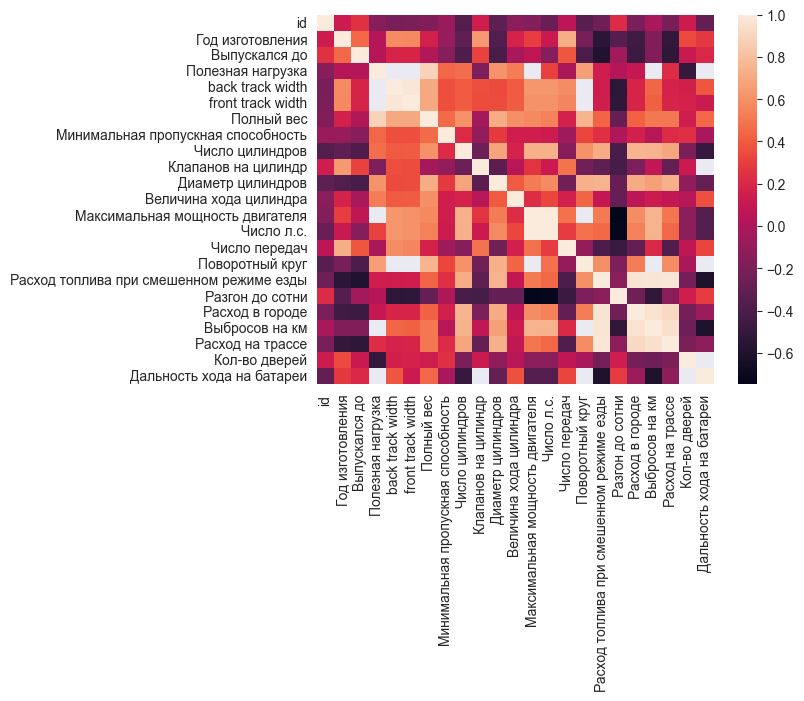

In [118]:
sns.heatmap(df.corr()) # карта изополей корреляции

In [119]:
df.corr()['Максимальная мощность двигателя'].sort_values()

C:\Users\erik_\AppData\Local\Temp\ipykernel_2808\3345256503.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Максимальная мощность двигателя'].sort_values()


Разгон до сотни                            -0.747769
Дальность хода на батареи                  -0.371792
id                                         -0.163195
Кол-во дверей                              -0.134008
Выпускался до                               0.071842
Минимальная пропускная способность          0.152134
Величина хода цилиндра                      0.222420
Клапанов на цилиндр                         0.255777
Год изготовления                            0.294305
Число передач                               0.476351
Расход на трассе                            0.500192
Расход топлива при смешенном режиме езды    0.511791
Диаметр цилиндров                           0.515663
Полный вес                                  0.570601
Расход в городе                             0.588015
front track width                           0.609286
back track width                            0.618312
Число цилиндров                             0.739586
Выбросов на км                              0.

<AxesSubplot: xlabel='Выбросов на км', ylabel='Максимальная мощность двигателя'>

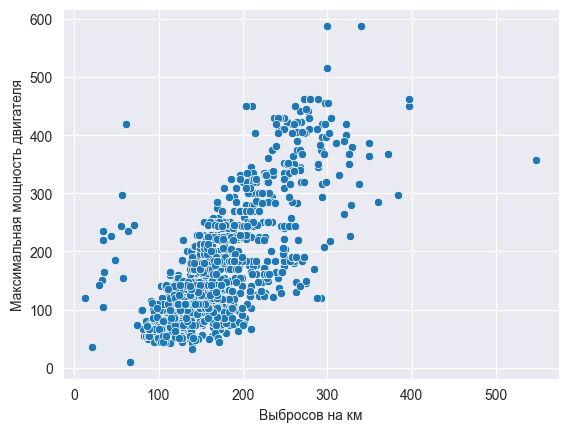

In [120]:
sns.scatterplot(x='Выбросов на км',y='Максимальная мощность двигателя',data=df)

In [121]:
df[(df['Выбросов на км']<100) & (df['Максимальная мощность двигателя']>400)]

,id,Производитель,Модель,Поколение,Год изготовления,Выпускался до,Серия,трим,Тип кузова,load_hieght_mm,...,Передняя подвеска,Тип рулевого упровления,Класс авто,Страна производитель,Кол-во дверей,Оценка безопасности,рейтинг,Расходи батареи на 100 км,Дальность хода на батареи,Время зарядки
51034,51140,Porsche,Panamera,2 generation [redesign],2020.0,2020.0,Hatchback 5 doors Executive,4.0 AMT 4WD,NaN,NaN,...,"Independent, spring",NaN,F,Germany,5.0,NaN,NaN,NaN,NaN,NaN
51039,51145,Porsche,Panamera,2 generation [redesign],2020.0,2020.0,wagon 5 doors,4.0 AMT 4WD,NaN,NaN,...,"Independent, spring",NaN,F,Germany,5.0,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: xlabel='Год изготовления', ylabel='Выбросов на км'>

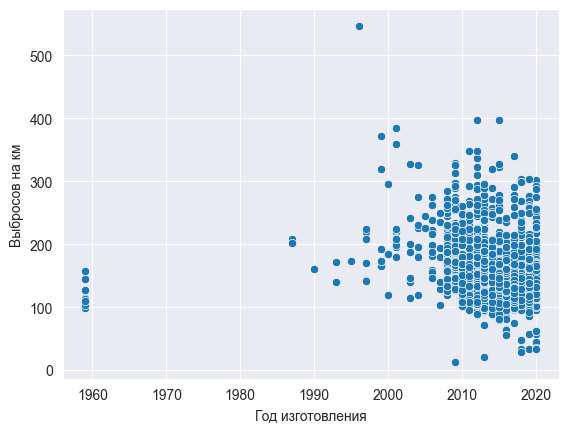

In [122]:
sns.scatterplot(x='Год изготовления',y='Выбросов на км',data=df)

In [123]:
df.isnull()

,id,Производитель,Модель,Поколение,Год изготовления,Выпускался до,Серия,трим,Тип кузова,load_hieght_mm,...,Передняя подвеска,Тип рулевого упровления,Класс авто,Страна производитель,Кол-во дверей,Оценка безопасности,рейтинг,Расходи батареи на 100 км,Дальность хода на батареи,Время зарядки
0,False,False,False,False,False,False,False,False,False,True,...,False,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,True,...,False,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,True,...,False,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70818,False,False,False,False,False,False,False,False,True,True,...,True,True,False,False,False,True,True,True,True,True
70819,False,False,False,False,False,False,False,False,True,True,...,True,True,False,False,False,True,True,True,True,True
70820,False,False,False,False,False,False,False,False,True,True,...,True,True,False,False,False,True,True,True,True,True
70821,False,False,False,False,False,False,False,False,True,True,...,True,True,False,False,False,True,True,True,True,True


In [124]:
df.isnull().sum()

id                               0
Производитель                    0
Модель                           0
Поколение                        4
Год изготовления               237
                             ...  
Оценка безопасности          69811
рейтинг                      69811
Расходи батареи на 100 км    70808
Дальность хода на батареи    70808
Время зарядки                70816
Length: 78, dtype: int64

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70823 entries, 0 to 70822
Data columns (total 78 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              70823 non-null  int64  
 1   Производитель                                   70823 non-null  object 
 2   Модель                                          70823 non-null  object 
 3   Поколение                                       70819 non-null  object 
 4   Год изготовления                                70586 non-null  float64
 5   Выпускался до                                   70189 non-null  float64
 6   Серия                                           70823 non-null  object 
 7   трим                                            70823 non-null  object 
 8   Тип кузова                                      52252 non-null  object 
 9   load_hieght_mm                         

In [126]:
df[df['Поколение'].isnull()]

,id,Производитель,Модель,Поколение,Год изготовления,Выпускался до,Серия,трим,Тип кузова,load_hieght_mm,...,Передняя подвеска,Тип рулевого упровления,Класс авто,Страна производитель,Кол-во дверей,Оценка безопасности,рейтинг,Расходи батареи на 100 км,Дальность хода на батареи,Время зарядки
34394,34429,Mazda,MX-5,NaN,1990.0,1998.0,Roadster,1.6 AT,Roadster,NaN,...,"Independent, Double wishbone, spring, Stabiliz...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34395,34430,Mazda,MX-5,NaN,1990.0,1998.0,Roadster,1.6 MT,Roadster,NaN,...,"Independent, Double wishbone, spring, Stabiliz...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34396,34431,Mazda,MX-5,NaN,1990.0,1998.0,Roadster,1.6 MT,Roadster,NaN,...,"Independent, Double wishbone, spring, Stabiliz...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34397,34432,Mazda,MX-5,NaN,1990.0,1998.0,Roadster,1.8 MT,Roadster,NaN,...,"Independent, Double wishbone, spring, Stabiliz...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
df[df['Модель'] == 'MX-5']

,id,Производитель,Модель,Поколение,Год изготовления,Выпускался до,Серия,трим,Тип кузова,load_hieght_mm,...,Передняя подвеска,Тип рулевого упровления,Класс авто,Страна производитель,Кол-во дверей,Оценка безопасности,рейтинг,Расходи батареи на 100 км,Дальность хода на батареи,Время зарядки
34394,34429,Mazda,MX-5,NaN,1990.0,1998.0,Roadster,1.6 AT,Roadster,NaN,...,"Independent, Double wishbone, spring, Stabiliz...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34395,34430,Mazda,MX-5,NaN,1990.0,1998.0,Roadster,1.6 MT,Roadster,NaN,...,"Independent, Double wishbone, spring, Stabiliz...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34396,34431,Mazda,MX-5,NaN,1990.0,1998.0,Roadster,1.6 MT,Roadster,NaN,...,"Independent, Double wishbone, spring, Stabiliz...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34397,34432,Mazda,MX-5,NaN,1990.0,1998.0,Roadster,1.8 MT,Roadster,NaN,...,"Independent, Double wishbone, spring, Stabiliz...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34398,34433,Mazda,MX-5,NB,1998.0,2000.0,Roadster,1.6 MT,Roadster,NaN,...,"Independent, Double wishbone, spring, Stabiliz...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34399,34434,Mazda,MX-5,NB,1998.0,2000.0,Roadster,1.8 5MT,Roadster,NaN,...,"Independent, Double wishbone, spring, Stabiliz...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34400,34435,Mazda,MX-5,NB,1998.0,2000.0,Roadster,1.8 5MT,Roadster,NaN,...,"Independent, Double wishbone, spring, Stabiliz...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34401,34436,Mazda,MX-5,NB,1998.0,2000.0,Roadster,1.8 6MT,Roadster,NaN,...,"Independent, Double wishbone, spring, Stabiliz...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34402,34437,Mazda,MX-5,NB,1998.0,2000.0,Roadster,1.8 6MT,Roadster,NaN,...,"Independent, Double wishbone, spring, Stabiliz...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34403,34438,Mazda,MX-5,NB,1998.0,2000.0,Roadster,1.8 AT,Roadster,NaN,...,"Independent, Double wishbone, spring, Stabiliz...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


https://ru.wikipedia.org/wiki/Mazda_MX-5 - по этой статье можно заполнить поколение автомобился NA (1 Поколение)

In [128]:
df.loc[df['Поколение'].isnull(), 'Поколение'] ='NA'

In [129]:
df[df['Модель'] == 'MX-5'] # Заполнил первый столбец

,id,Производитель,Модель,Поколение,Год изготовления,Выпускался до,Серия,трим,Тип кузова,load_hieght_mm,...,Передняя подвеска,Тип рулевого упровления,Класс авто,Страна производитель,Кол-во дверей,Оценка безопасности,рейтинг,Расходи батареи на 100 км,Дальность хода на батареи,Время зарядки
34394,34429,Mazda,MX-5,NA,1990.0,1998.0,Roadster,1.6 AT,Roadster,NaN,...,"Independent, Double wishbone, spring, Stabiliz...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34395,34430,Mazda,MX-5,NA,1990.0,1998.0,Roadster,1.6 MT,Roadster,NaN,...,"Independent, Double wishbone, spring, Stabiliz...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34396,34431,Mazda,MX-5,NA,1990.0,1998.0,Roadster,1.6 MT,Roadster,NaN,...,"Independent, Double wishbone, spring, Stabiliz...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34397,34432,Mazda,MX-5,NA,1990.0,1998.0,Roadster,1.8 MT,Roadster,NaN,...,"Independent, Double wishbone, spring, Stabiliz...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34398,34433,Mazda,MX-5,NB,1998.0,2000.0,Roadster,1.6 MT,Roadster,NaN,...,"Independent, Double wishbone, spring, Stabiliz...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34399,34434,Mazda,MX-5,NB,1998.0,2000.0,Roadster,1.8 5MT,Roadster,NaN,...,"Independent, Double wishbone, spring, Stabiliz...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34400,34435,Mazda,MX-5,NB,1998.0,2000.0,Roadster,1.8 5MT,Roadster,NaN,...,"Independent, Double wishbone, spring, Stabiliz...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34401,34436,Mazda,MX-5,NB,1998.0,2000.0,Roadster,1.8 6MT,Roadster,NaN,...,"Independent, Double wishbone, spring, Stabiliz...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34402,34437,Mazda,MX-5,NB,1998.0,2000.0,Roadster,1.8 6MT,Roadster,NaN,...,"Independent, Double wishbone, spring, Stabiliz...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34403,34438,Mazda,MX-5,NB,1998.0,2000.0,Roadster,1.8 AT,Roadster,NaN,...,"Independent, Double wishbone, spring, Stabiliz...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
df.isnull().sum()

id                               0
Производитель                    0
Модель                           0
Поколение                        0
Год изготовления               237
                             ...  
Оценка безопасности          69811
рейтинг                      69811
Расходи батареи на 100 км    70808
Дальность хода на батареи    70808
Время зарядки                70816
Length: 78, dtype: int64

In [131]:
df[df['Год изготовления'].isnull()]

,id,Производитель,Модель,Поколение,Год изготовления,Выпускался до,Серия,трим,Тип кузова,load_hieght_mm,...,Передняя подвеска,Тип рулевого упровления,Класс авто,Страна производитель,Кол-во дверей,Оценка безопасности,рейтинг,Расходи батареи на 100 км,Дальность хода на батареи,Время зарядки
1268,1269,Audi,80,B1,NaN,NaN,Sedan,1.3 AT,NaN,NaN,...,NaN,NaN,D,Germany,4.0,NaN,NaN,NaN,NaN,NaN
1269,1270,Audi,80,B1,NaN,NaN,Sedan,1.3 AT,NaN,NaN,...,NaN,NaN,D,Germany,4.0,NaN,NaN,NaN,NaN,NaN
1270,1271,Audi,80,B1,NaN,NaN,Sedan,1.3 MT,NaN,NaN,...,NaN,NaN,D,Germany,4.0,NaN,NaN,NaN,NaN,NaN
1271,1272,Audi,80,B1,NaN,NaN,Sedan,1.3 MT,NaN,NaN,...,NaN,NaN,D,Germany,4.0,NaN,NaN,NaN,NaN,NaN
1272,1273,Audi,80,B1,NaN,NaN,Sedan,1.5 AT,NaN,NaN,...,NaN,NaN,D,Germany,4.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61077,61214,Toyota,Crown,S120,NaN,NaN,wagon 5 doors,2.5 MT,NaN,NaN,...,NaN,NaN,E,Japan,5.0,NaN,NaN,NaN,NaN,NaN
61078,61215,Toyota,Crown,S120,NaN,NaN,wagon 5 doors,2.8 AT,NaN,NaN,...,NaN,NaN,E,Japan,5.0,NaN,NaN,NaN,NaN,NaN
61079,61216,Toyota,Crown,S120,NaN,NaN,wagon 5 doors,2.8 MT,NaN,NaN,...,NaN,NaN,E,Japan,5.0,NaN,NaN,NaN,NaN,NaN
61677,61814,Toyota,Highlander,4 generation,NaN,NaN,SUV 5 doors,3.5 AT 4WD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
df[(df['Производитель'] == 'Audi') & (df['Модель'] == '80')]

,id,Производитель,Модель,Поколение,Год изготовления,Выпускался до,Серия,трим,Тип кузова,load_hieght_mm,...,Передняя подвеска,Тип рулевого упровления,Класс авто,Страна производитель,Кол-во дверей,Оценка безопасности,рейтинг,Расходи батареи на 100 км,Дальность хода на батареи,Время зарядки
1137,1138,Audi,80,4 generation (B3),1986.0,1991.0,Sedan,1.6 D MT diesel,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1138,1139,Audi,80,4 generation (B3),1986.0,1991.0,Sedan,1.6 MT gasoline,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1139,1140,Audi,80,4 generation (B3),1986.0,1991.0,Sedan,1.6 MT gasoline,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1140,1141,Audi,80,4 generation (B3),1986.0,1991.0,Sedan,1.6 TD AT diesel,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1141,1142,Audi,80,4 generation (B3),1986.0,1991.0,Sedan,1.6 TD MT diesel,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,1342,Audi,80,B2,1978.0,1986.0,Sedan 4-doors,1.9 MT,Sedan,NaN,...,Strut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1342,1343,Audi,80,B2,1978.0,1986.0,Sedan 4-doors,2.0 AT,Sedan,NaN,...,Strut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1343,1344,Audi,80,B2,1978.0,1986.0,Sedan 4-doors,2.0 MT,Sedan,NaN,...,Strut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1344,1345,Audi,80,B2,1978.0,1986.0,Sedan 4-doors,2.0 quattro MT,Sedan,NaN,...,Strut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
df.loc[df['Год изготовления'].isnull(), 'Год изготовления'] = 1972

In [134]:
df.isnull().sum()

id                               0
Производитель                    0
Модель                           0
Поколение                        0
Год изготовления                 0
                             ...  
Оценка безопасности          69811
рейтинг                      69811
Расходи батареи на 100 км    70808
Дальность хода на батареи    70808
Время зарядки                70816
Length: 78, dtype: int64

In [135]:
df[df['Выпускался до'].isnull()]

,id,Производитель,Модель,Поколение,Год изготовления,Выпускался до,Серия,трим,Тип кузова,load_hieght_mm,...,Передняя подвеска,Тип рулевого упровления,Класс авто,Страна производитель,Кол-во дверей,Оценка безопасности,рейтинг,Расходи батареи на 100 км,Дальность хода на батареи,Время зарядки
1268,1269,Audi,80,B1,1972.0,NaN,Sedan,1.3 AT,NaN,NaN,...,NaN,NaN,D,Germany,4.0,NaN,NaN,NaN,NaN,NaN
1269,1270,Audi,80,B1,1972.0,NaN,Sedan,1.3 AT,NaN,NaN,...,NaN,NaN,D,Germany,4.0,NaN,NaN,NaN,NaN,NaN
1270,1271,Audi,80,B1,1972.0,NaN,Sedan,1.3 MT,NaN,NaN,...,NaN,NaN,D,Germany,4.0,NaN,NaN,NaN,NaN,NaN
1271,1272,Audi,80,B1,1972.0,NaN,Sedan,1.3 MT,NaN,NaN,...,NaN,NaN,D,Germany,4.0,NaN,NaN,NaN,NaN,NaN
1272,1273,Audi,80,B1,1972.0,NaN,Sedan,1.5 AT,NaN,NaN,...,NaN,NaN,D,Germany,4.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68280,68445,Volkswagen,Passat Variant,1 generation,2010.0,NaN,wagon (5 doors),1.4 TDI DSG,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68281,68446,Volkswagen,Passat Variant,1 generation,2010.0,NaN,wagon (5 doors),1.6 TDI 6 MT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68282,68447,Volkswagen,Passat Variant,1 generation,2010.0,NaN,wagon (5 doors),1.8 TDI DSG,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68283,68448,Volkswagen,Passat Variant,1 generation,2010.0,NaN,wagon (5 doors),2.0 TDI DSG,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Строку выпускался до заполним По формуле средневзвешенное значение срока поколенния + дата начала выпуска = дата окончания выпуска авто

In [136]:
df.isnull().sum()

id                               0
Производитель                    0
Модель                           0
Поколение                        0
Год изготовления                 0
                             ...  
Оценка безопасности          69811
рейтинг                      69811
Расходи батареи на 100 км    70808
Дальность хода на батареи    70808
Время зарядки                70816
Length: 78, dtype: int64

In [137]:
def delta(row):
    delta = row['Выпускался до'] - row['Год изготовления']
    if delta <20 and delta>0:
        return row['Выпускался до'] - row['Год изготовления']
    else:
        return 0

In [138]:
df['delta'] = df.apply(delta, axis=1)
df


,id,Производитель,Модель,Поколение,Год изготовления,Выпускался до,Серия,трим,Тип кузова,load_hieght_mm,...,Тип рулевого упровления,Класс авто,Страна производитель,Кол-во дверей,Оценка безопасности,рейтинг,Расходи батареи на 100 км,Дальность хода на батареи,Время зарядки,delta
0,1,AC,ACE,1 generation,1993.0,2000.0,Cabriolet,3.5 MT,Cabriolet,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
1,2,AC,ACE,1 generation,1993.0,2000.0,Cabriolet,4.6 MT,Cabriolet,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
2,3,AC,ACE,1 generation,1993.0,2000.0,Cabriolet,4.9 AT,Cabriolet,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
3,4,AC,ACE,1 generation,1993.0,2000.0,Roadster,2.9 AT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
4,5,AC,ACE,1 generation,1993.0,2000.0,Roadster,2.9 MT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70818,70983,ZX,Landmark,1 generation,2007.0,2009.0,SUV 5 doors,2.4 AT 4WD,NaN,NaN,...,NaN,J,China,5.0,NaN,NaN,NaN,NaN,NaN,2.0
70819,70984,ZX,Landmark,1 generation,2007.0,2009.0,SUV 5 doors,2.4 MT,NaN,NaN,...,NaN,J,China,5.0,NaN,NaN,NaN,NaN,NaN,2.0
70820,70985,ZX,Landmark,1 generation,2007.0,2009.0,SUV 5 doors,2.4 MT 4WD,NaN,NaN,...,NaN,J,China,5.0,NaN,NaN,NaN,NaN,NaN,2.0
70821,70986,ZX,Landmark,1 generation,2007.0,2009.0,SUV 5 doors,3.2 AT 4WD,NaN,NaN,...,NaN,J,China,5.0,NaN,NaN,NaN,NaN,NaN,2.0


In [139]:
meanGenerationTime = round(df.loc[df['delta'] > 0, 'delta'].mean())

In [140]:
df.loc[df['Выпускался до'].isnull(), 'Выпускался до'] = df['Год изготовления'] + meanGenerationTime

In [141]:
df

,id,Производитель,Модель,Поколение,Год изготовления,Выпускался до,Серия,трим,Тип кузова,load_hieght_mm,...,Тип рулевого упровления,Класс авто,Страна производитель,Кол-во дверей,Оценка безопасности,рейтинг,Расходи батареи на 100 км,Дальность хода на батареи,Время зарядки,delta
0,1,AC,ACE,1 generation,1993.0,2000.0,Cabriolet,3.5 MT,Cabriolet,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
1,2,AC,ACE,1 generation,1993.0,2000.0,Cabriolet,4.6 MT,Cabriolet,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
2,3,AC,ACE,1 generation,1993.0,2000.0,Cabriolet,4.9 AT,Cabriolet,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
3,4,AC,ACE,1 generation,1993.0,2000.0,Roadster,2.9 AT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
4,5,AC,ACE,1 generation,1993.0,2000.0,Roadster,2.9 MT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70818,70983,ZX,Landmark,1 generation,2007.0,2009.0,SUV 5 doors,2.4 AT 4WD,NaN,NaN,...,NaN,J,China,5.0,NaN,NaN,NaN,NaN,NaN,2.0
70819,70984,ZX,Landmark,1 generation,2007.0,2009.0,SUV 5 doors,2.4 MT,NaN,NaN,...,NaN,J,China,5.0,NaN,NaN,NaN,NaN,NaN,2.0
70820,70985,ZX,Landmark,1 generation,2007.0,2009.0,SUV 5 doors,2.4 MT 4WD,NaN,NaN,...,NaN,J,China,5.0,NaN,NaN,NaN,NaN,NaN,2.0
70821,70986,ZX,Landmark,1 generation,2007.0,2009.0,SUV 5 doors,3.2 AT 4WD,NaN,NaN,...,NaN,J,China,5.0,NaN,NaN,NaN,NaN,NaN,2.0


Подчищена часть данных

In [142]:
df = df.drop(columns='delta')

id                               0
Производитель                    0
Модель                           0
Поколение                        0
Год изготовления                 0
                             ...  
Оценка безопасности          69811
рейтинг                      69811
Расходи батареи на 100 км    70808
Дальность хода на батареи    70808
Время зарядки                70816
Length: 78, dtype: int64

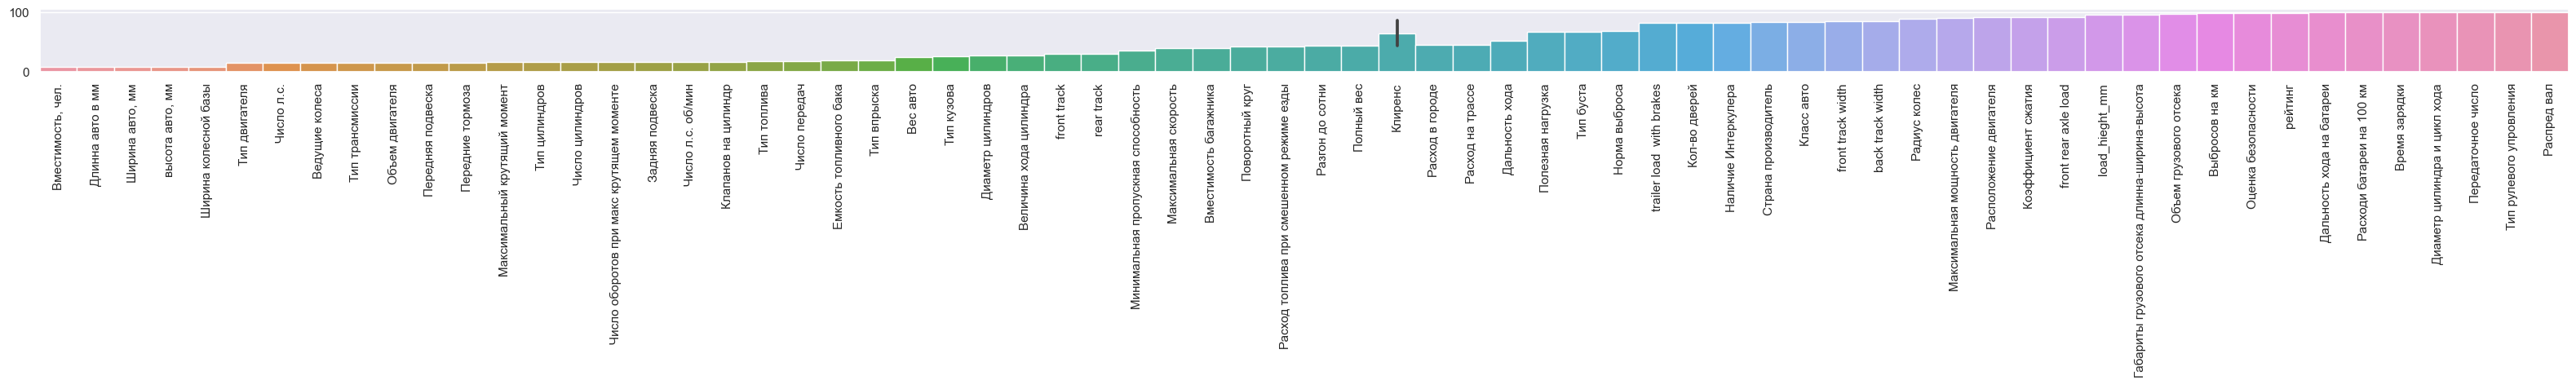

In [183]:

fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(50,1)})
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index,y=percent_nan, width= 1,)

plt.xticks(rotation=90)
plt.show()

In [184]:
df[df['Вместимость, чел.'].isnull()]

,id,Производитель,Модель,Поколение,Год изготовления,Выпускался до,Серия,трим,Тип кузова,load_hieght_mm,...,Передняя подвеска,Тип рулевого упровления,Класс авто,Страна производитель,Кол-во дверей,Оценка безопасности,рейтинг,Расходи батареи на 100 км,Дальность хода на батареи,Время зарядки
3,4,AC,ACE,1 generation,1993.0,2000.0,Roadster,2.9 AT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,AC,ACE,1 generation,1993.0,2000.0,Roadster,2.9 MT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,AC,ACE,1 generation,1993.0,2000.0,Roadster,3.0 MT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,AC,ACE,1 generation,1993.0,2000.0,Roadster,3.5 MT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,AC,ACE,1 generation,1993.0,2000.0,Roadster,4.6 MT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70786,70951,Zotye,Nomad (RX6400),1 generation,2005.0,2016.0,SUV 5 doors,1.5 MT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70787,70952,Zotye,Nomad (RX6400),1 generation,2005.0,2016.0,SUV 5 doors,1.6 AT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70788,70953,Zotye,Nomad (RX6400),1 generation,2005.0,2016.0,SUV 5 doors,1.6 MT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70789,70954,Zotye,SR9,1 generation,2016.0,2019.0,SUV 5 doors,2.0 AMT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
df.isnull().sum()

id                               0
Производитель                    0
Модель                           0
Поколение                        0
Год изготовления                 0
                             ...  
Оценка безопасности          69811
рейтинг                      69811
Расходи батареи на 100 км    70808
Дальность хода на батареи    70808
Время зарядки                70816
Length: 78, dtype: int64

In [186]:
df

,id,Производитель,Модель,Поколение,Год изготовления,Выпускался до,Серия,трим,Тип кузова,load_hieght_mm,...,Передняя подвеска,Тип рулевого упровления,Класс авто,Страна производитель,Кол-во дверей,Оценка безопасности,рейтинг,Расходи батареи на 100 км,Дальность хода на батареи,Время зарядки
0,1,AC,ACE,1 generation,1993.0,2000.0,Cabriolet,3.5 MT,Cabriolet,NaN,...,Helical springs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,AC,ACE,1 generation,1993.0,2000.0,Cabriolet,4.6 MT,Cabriolet,NaN,...,Helical springs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,AC,ACE,1 generation,1993.0,2000.0,Cabriolet,4.9 AT,Cabriolet,NaN,...,Helical springs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,AC,ACE,1 generation,1993.0,2000.0,Roadster,2.9 AT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,AC,ACE,1 generation,1993.0,2000.0,Roadster,2.9 MT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70818,70983,ZX,Landmark,1 generation,2007.0,2009.0,SUV 5 doors,2.4 AT 4WD,NaN,NaN,...,NaN,NaN,J,China,5.0,NaN,NaN,NaN,NaN,NaN
70819,70984,ZX,Landmark,1 generation,2007.0,2009.0,SUV 5 doors,2.4 MT,NaN,NaN,...,NaN,NaN,J,China,5.0,NaN,NaN,NaN,NaN,NaN
70820,70985,ZX,Landmark,1 generation,2007.0,2009.0,SUV 5 doors,2.4 MT 4WD,NaN,NaN,...,NaN,NaN,J,China,5.0,NaN,NaN,NaN,NaN,NaN
70821,70986,ZX,Landmark,1 generation,2007.0,2009.0,SUV 5 doors,3.2 AT 4WD,NaN,NaN,...,NaN,NaN,J,China,5.0,NaN,NaN,NaN,NaN,NaN


Делаем вывод что с поколениями автомобилей особо ничего не сделать, В дальнейшем можно будет внести свои поколени автомобилей (например по десятилетию)

In [187]:
df['Поколение'].value_counts()

1 generation               13640
2 generation                5494
1 generation [redesign]     5070
3 generation                2960
2 generation [redesign]     2416
                           ...  
T207                           1
4 Rodeo                        1
T214                           1
SZ [redesign]                  1
14 generation                  1
Name: Поколение, Length: 1743, dtype: int64

# Удалим все элемктромобили тк они относятся к другой категории, а хочется смотреть закономерности для более популярного автотранспорта(всего 7 электоавтомобилей на момент 2020)

In [188]:
df[df['Время зарядки'].notnull()]

,id,Производитель,Модель,Поколение,Год изготовления,Выпускался до,Серия,трим,Тип кузова,load_hieght_mm,...,Передняя подвеска,Тип рулевого упровления,Класс авто,Страна производитель,Кол-во дверей,Оценка безопасности,рейтинг,Расходи батареи на 100 км,Дальность хода на батареи,Время зарядки
30505,30540,Kia,Ceed,3 generation,2018.0,2019.0,wagon 5 doors,1.6 AMT,NaN,NaN,...,"Independent, spring",NaN,C,South Korea,5.0,NaN,NaN,"8,9",48.0,"2,8"
30885,30920,Kia,Optima,4 generation [redesign],2018.0,2020.0,wagon,2.0 AT,NaN,NaN,...,"Independent, spring",NaN,D,South Korea,5.0,NaN,NaN,"31,3",62.0,"3,2"
37590,37656,Mercedes-Benz,GLC,1 generation (253),2015.0,2019.0,SUV 5 doors,2.0 AT 4WD,NaN,NaN,...,"Independent, spring",NaN,J,Germany,5.0,5-May,EuroNCAP,"8,7",34.0,"4,1"
49177,49261,Peugeot,3008,2 generation [redesign],2020.0,2020.0,SUV 5 doors,1.6 AT,NaN,NaN,...,"Independent, spring",NaN,J,France,5.0,NaN,NaN,"13,2",56.0,7
50930,51036,Porsche,Cayenne,3 generation,2017.0,2019.0,SUV 5 doors,3.0 AT 4WD,NaN,NaN,...,"Independent, spring",NaN,J,Germany,5.0,5-May,EuroNCAP,"14,1",42.0,"7,75"
50932,51038,Porsche,Cayenne,3 generation,2017.0,2019.0,SUV 5 doors,4.0 AT 4WD,NaN,NaN,...,"Independent, spring",NaN,J,Germany,5.0,5-May,EuroNCAP,"14,1",32.0,"2,3"
50974,51080,Porsche,Cayenne Coupe,1 generation,2019.0,2020.0,SUV 5 doors,3.0 AT 4WD,NaN,NaN,...,"Independent, spring",NaN,J,Germany,5.0,NaN,NaN,"14,1",42.0,"7,75"


In [189]:
df[df['Дальность хода на батареи'].notnull()]

,id,Производитель,Модель,Поколение,Год изготовления,Выпускался до,Серия,трим,Тип кузова,load_hieght_mm,...,Передняя подвеска,Тип рулевого упровления,Класс авто,Страна производитель,Кол-во дверей,Оценка безопасности,рейтинг,Расходи батареи на 100 км,Дальность хода на батареи,Время зарядки
30505,30540,Kia,Ceed,3 generation,2018.0,2019.0,wagon 5 doors,1.6 AMT,NaN,NaN,...,"Independent, spring",NaN,C,South Korea,5.0,NaN,NaN,"8,9",48.0,"2,8"
30885,30920,Kia,Optima,4 generation [redesign],2018.0,2020.0,wagon,2.0 AT,NaN,NaN,...,"Independent, spring",NaN,D,South Korea,5.0,NaN,NaN,"31,3",62.0,"3,2"
37590,37656,Mercedes-Benz,GLC,1 generation (253),2015.0,2019.0,SUV 5 doors,2.0 AT 4WD,NaN,NaN,...,"Independent, spring",NaN,J,Germany,5.0,5-May,EuroNCAP,"8,7",34.0,"4,1"
37598,37664,Mercedes-Benz,GLC,1 generation (253) [redesign],2019.0,2019.0,SUV 5 doors,2.0 AT 4WD,NaN,NaN,...,"Independent, spring",NaN,J,Germany,5.0,NaN,NaN,"13,5",46.0,NaN
37604,37670,Mercedes-Benz,GLC Coupe,C253,2016.0,2021.0,SUV 5-doors,2.0 AT 4WD,NaN,NaN,...,"Independent, spring",NaN,J,Germany,5.0,NaN,NaN,NaN,34.0,NaN
37655,37721,Mercedes-Benz,GLE,1 generation (W166),2018.0,2019.0,SUV 5 doors,3.0 AT 4WD,NaN,NaN,...,"Independent, spring",NaN,J,Germany,5.0,5-May,EuroNCAP,NaN,30.0,NaN
37662,37728,Mercedes-Benz,GLE,2 generation (V167),2018.0,2020.0,SUV 5 doors,2.0 AT 4WD,NaN,NaN,...,"Independent, spring",NaN,J,Germany,5.0,5-May,EuroNCAP,"31,2",106.0,NaN
37669,37735,Mercedes-Benz,GLE Coupe,C167,2019.0,2019.0,SUV 5 doors,2.0 AT 4WD,NaN,NaN,...,"Independent, spring",NaN,J,Germany,5.0,NaN,NaN,"31,2",100.0,NaN
49177,49261,Peugeot,3008,2 generation [redesign],2020.0,2020.0,SUV 5 doors,1.6 AT,NaN,NaN,...,"Independent, spring",NaN,J,France,5.0,NaN,NaN,"13,2",56.0,7
50930,51036,Porsche,Cayenne,3 generation,2017.0,2019.0,SUV 5 doors,3.0 AT 4WD,NaN,NaN,...,"Independent, spring",NaN,J,Germany,5.0,5-May,EuroNCAP,"14,1",42.0,"7,75"


In [193]:
dropId = df[df['Расходи батареи на 100 км'].notnull()].index

In [194]:
df.drop(dropId, axis=0)

,id,Производитель,Модель,Поколение,Год изготовления,Выпускался до,Серия,трим,Тип кузова,load_hieght_mm,...,Передняя подвеска,Тип рулевого упровления,Класс авто,Страна производитель,Кол-во дверей,Оценка безопасности,рейтинг,Расходи батареи на 100 км,Дальность хода на батареи,Время зарядки
0,1,AC,ACE,1 generation,1993.0,2000.0,Cabriolet,3.5 MT,Cabriolet,NaN,...,Helical springs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,AC,ACE,1 generation,1993.0,2000.0,Cabriolet,4.6 MT,Cabriolet,NaN,...,Helical springs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,AC,ACE,1 generation,1993.0,2000.0,Cabriolet,4.9 AT,Cabriolet,NaN,...,Helical springs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,AC,ACE,1 generation,1993.0,2000.0,Roadster,2.9 AT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,AC,ACE,1 generation,1993.0,2000.0,Roadster,2.9 MT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70818,70983,ZX,Landmark,1 generation,2007.0,2009.0,SUV 5 doors,2.4 AT 4WD,NaN,NaN,...,NaN,NaN,J,China,5.0,NaN,NaN,NaN,NaN,NaN
70819,70984,ZX,Landmark,1 generation,2007.0,2009.0,SUV 5 doors,2.4 MT,NaN,NaN,...,NaN,NaN,J,China,5.0,NaN,NaN,NaN,NaN,NaN
70820,70985,ZX,Landmark,1 generation,2007.0,2009.0,SUV 5 doors,2.4 MT 4WD,NaN,NaN,...,NaN,NaN,J,China,5.0,NaN,NaN,NaN,NaN,NaN
70821,70986,ZX,Landmark,1 generation,2007.0,2009.0,SUV 5 doors,3.2 AT 4WD,NaN,NaN,...,NaN,NaN,J,China,5.0,NaN,NaN,NaN,NaN,NaN


In [195]:
info = df.isnull().sum()

id                               0
Производитель                    0
Модель                           0
Поколение                        0
Год изготовления                 0
                             ...  
Оценка безопасности          69811
рейтинг                      69811
Расходи батареи на 100 км    70808
Дальность хода на батареи    70808
Время зарядки                70816
Length: 78, dtype: int64

In [200]:
df = df.dropna(thresh=len(df)*0.01, axis=1) # Удалили столбцы где менее одного процента заполнения

In [201]:
df

,id,Производитель,Модель,Поколение,Год изготовления,Выпускался до,Серия,трим,Тип кузова,load_hieght_mm,...,Расход на трассе,Задняя подвеска,Задняя подвеска,Передние тормоза,Передняя подвеска,Класс авто,Страна производитель,Кол-во дверей,Оценка безопасности,рейтинг
0,1,AC,ACE,1 generation,1993.0,2000.0,Cabriolet,3.5 MT,Cabriolet,NaN,...,9.0,Helical springs,ventilated disc,ventilated disc,Helical springs,NaN,NaN,NaN,NaN,NaN
1,2,AC,ACE,1 generation,1993.0,2000.0,Cabriolet,4.6 MT,Cabriolet,NaN,...,10.0,Helical springs,ventilated disc,ventilated disc,Helical springs,NaN,NaN,NaN,NaN,NaN
2,3,AC,ACE,1 generation,1993.0,2000.0,Cabriolet,4.9 AT,Cabriolet,NaN,...,NaN,Helical springs,ventilated disc,ventilated disc,Helical springs,NaN,NaN,NaN,NaN,NaN
3,4,AC,ACE,1 generation,1993.0,2000.0,Roadster,2.9 AT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,AC,ACE,1 generation,1993.0,2000.0,Roadster,2.9 MT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70818,70983,ZX,Landmark,1 generation,2007.0,2009.0,SUV 5 doors,2.4 AT 4WD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,J,China,5.0,NaN,NaN
70819,70984,ZX,Landmark,1 generation,2007.0,2009.0,SUV 5 doors,2.4 MT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,J,China,5.0,NaN,NaN
70820,70985,ZX,Landmark,1 generation,2007.0,2009.0,SUV 5 doors,2.4 MT 4WD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,J,China,5.0,NaN,NaN
70821,70986,ZX,Landmark,1 generation,2007.0,2009.0,SUV 5 doors,3.2 AT 4WD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,J,China,5.0,NaN,NaN


In [203]:
df.isnull().sum()

id                          0
Производитель               0
Модель                      0
Поколение                   0
Год изготовления            0
                        ...  
Класс авто              59058
Страна производитель    58458
Кол-во дверей           57699
Оценка безопасности     69811
рейтинг                 69811
Length: 71, dtype: int64

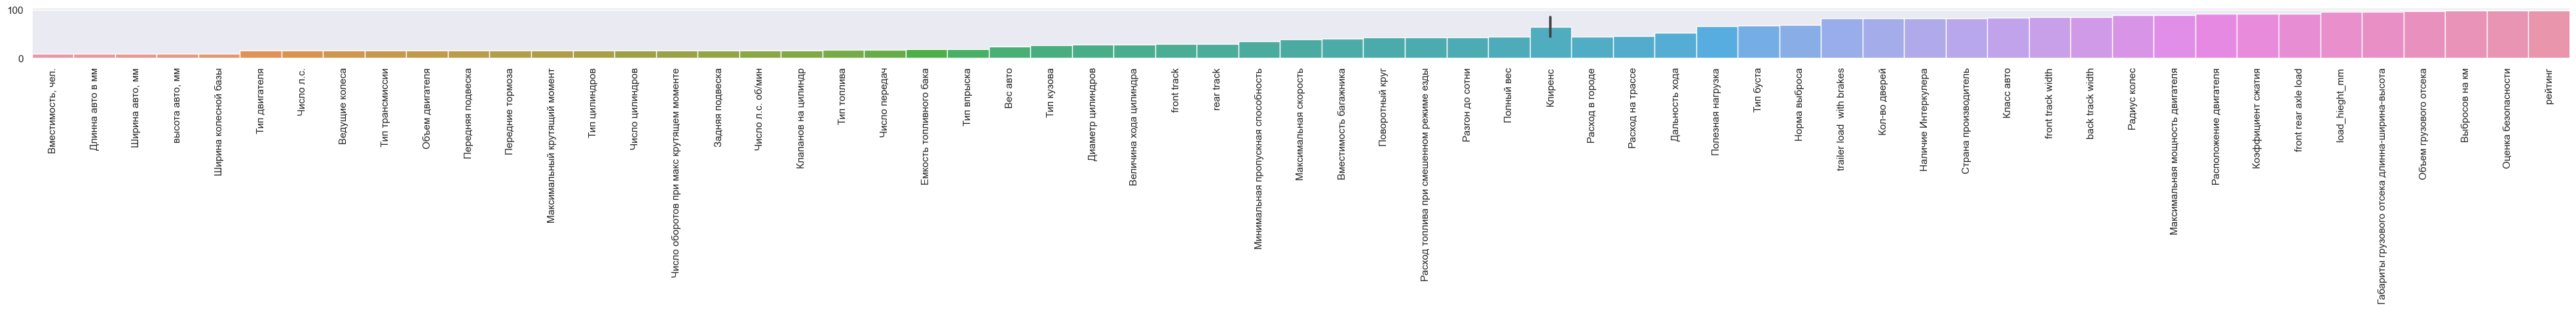

In [205]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(60,1)})
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index,y=percent_nan, width= 1,)

plt.xticks(rotation=90)
plt.show()